# Imports

In [1]:
import matplotlib.pyplot as plt

import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Train Data

In [2]:
train_df = pd.read_csv("../data/train.csv")

train_df["date"] = pd.to_datetime(train_df["date"], format="%Y%m%d%H")

train_df.head()

,date,wp1,wp2,wp3,wp4,wp5,wp6,wp7
0,2009-07-01 00:00:00,0.045,0.233,0.494,0.105,0.056,0.118,0.051
1,2009-07-01 01:00:00,0.085,0.249,0.257,0.105,0.066,0.066,0.051
2,2009-07-01 02:00:00,0.020,0.175,0.178,0.033,0.015,0.026,0.000
3,2009-07-01 03:00:00,0.060,0.085,0.109,0.022,0.010,0.013,0.000
4,2009-07-01 04:00:00,0.045,0.032,0.079,0.039,0.010,0.000,0.000


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18757 entries, 0 to 18756
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18757 non-null  datetime64[ns]
 1   wp1     18757 non-null  float64       
 2   wp2     18757 non-null  float64       
 3   wp3     18757 non-null  float64       
 4   wp4     18757 non-null  float64       
 5   wp5     18757 non-null  float64       
 6   wp6     18757 non-null  float64       
 7   wp7     18757 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.1 MB


In [4]:
train_df.describe()

,date,wp1,wp2,wp3,wp4,wp5,wp6,wp7
count,18757,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000
mean,2010-09-11 03:47:54.894705920,0.252388,0.265983,0.334571,0.286173,0.272584,0.286774,0.290542
min,2009-07-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010-01-12 09:00:00,0.050000,0.042000,0.069000,0.022000,0.040000,0.053000,0.025000
50%,2010-07-26 18:00:00,0.175000,0.164000,0.217000,0.182000,0.157000,0.184000,0.177000
75%,2011-03-29 03:00:00,0.381000,0.423000,0.563000,0.474000,0.415000,0.461000,0.505000
max,2012-06-26 12:00:00,0.947000,0.989000,0.978000,0.992000,0.966000,0.974000,0.960000
std,NaN,0.246381,0.273205,0.318636,0.295069,0.294221,0.283023,0.305272


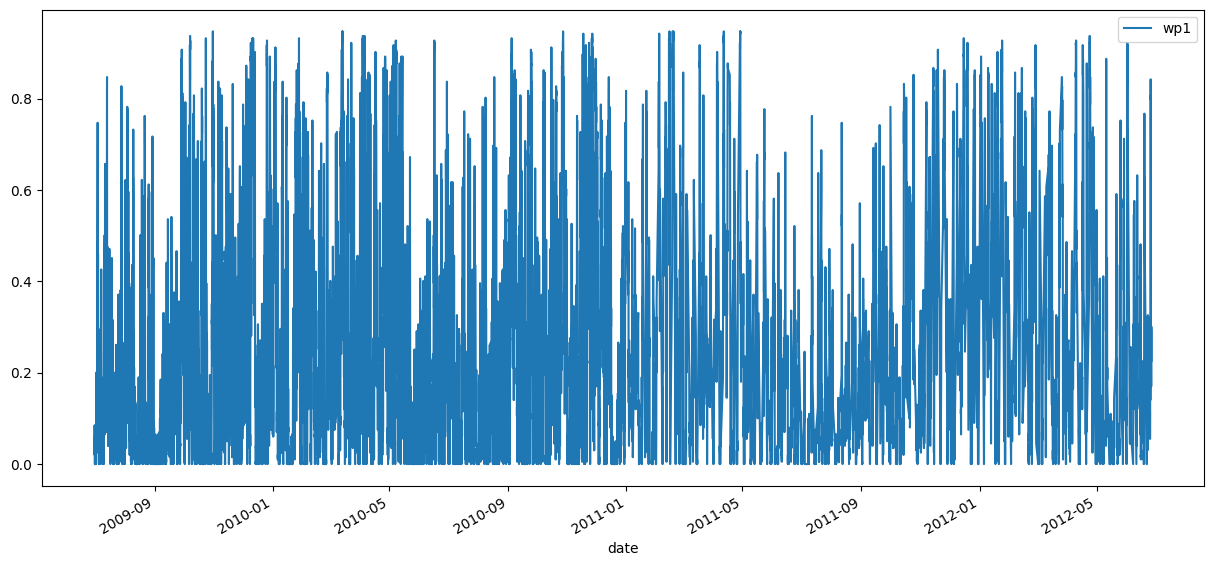

In [5]:
df = train_df[["date", "wp1"]].copy()

# df = df[df["date"].between("2011-01-01", "2011-01-07")].copy()

df.set_index("date", inplace=True)

df.plot(figsize=(15, 7));

There are some gaps. Probably when the value is zero.

In [6]:
df.head(20)

,wp1
date,
2009-07-01 00:00:00,0.045
2009-07-01 01:00:00,0.085
2009-07-01 02:00:00,0.020
2009-07-01 03:00:00,0.060
2009-07-01 04:00:00,0.045
2009-07-01 05:00:00,0.035
2009-07-01 06:00:00,0.005
2009-07-01 07:00:00,0.000
2009-07-01 08:00:00,0.000


In [7]:
len(train_df)

18757

In [8]:
train_df[train_df["wp1"] <= 0.00000001].shape

(2128, 8)

In [9]:
2128 / 18757

0.11345097830143414

# Test Data

In [10]:
test_df = pd.read_csv("../data/test.csv")

test_df["date"] = pd.to_datetime(test_df["date"], format="%Y%m%d%H")
test_df = test_df.sort_values(by="date").reset_index(drop=True)

test_df.head()

,id,date
0,1,2011-01-01 01:00:00
1,2,2011-01-01 02:00:00
2,3,2011-01-01 03:00:00
3,4,2011-01-01 04:00:00
4,5,2011-01-01 05:00:00


In [11]:
test_df["date"].min()

Timestamp('2011-01-01 01:00:00')

In [12]:
test_df["date"].max()

Timestamp('2012-06-28 12:00:00')

# Wind Forecast

In [25]:
wf_1 = pd.read_csv("../data/windforecasts_wf1.csv")

wf_1.rename({"date":"available_date"}, axis=1, inplace=True)

wf_1["available_date"] = pd.to_datetime(wf_1["available_date"], format="%Y%m%d%H")
wf_1["prediction_date"] = wf_1["available_date"] + pd.to_timedelta(wf_1["hors"], unit="hours")

wf_1 = wf_1[['available_date', 'prediction_date', 'hors', 'u', 'v', 'ws', 'wd']].copy()


wf_1.head(100)

,available_date,prediction_date,hors,u,v,ws,wd
0,2009-07-01 00:00:00,2009-07-01 01:00:00,1,2.34,-0.79,2.47,108.68
1,2009-07-01 00:00:00,2009-07-01 02:00:00,2,2.18,-0.99,2.40,114.31
2,2009-07-01 00:00:00,2009-07-01 03:00:00,3,2.20,-1.21,2.51,118.71
3,2009-07-01 00:00:00,2009-07-01 04:00:00,4,2.35,-1.40,2.73,120.86
4,2009-07-01 00:00:00,2009-07-01 05:00:00,5,2.53,-1.47,2.93,120.13
5,2009-07-01 00:00:00,2009-07-01 06:00:00,6,2.66,-1.29,2.96,115.79
6,2009-07-01 00:00:00,2009-07-01 07:00:00,7,2.69,-0.81,2.81,106.71
7,2009-07-01 00:00:00,2009-07-01 08:00:00,8,2.72,-0.26,2.73,95.39
8,2009-07-01 00:00:00,2009-07-01 09:00:00,9,2.87,0.08,2.87,88.50
9,2009-07-01 00:00:00,2009-07-01 10:00:00,10,3.23,-0.01,3.23,90.19


In [14]:
wf_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104832 entries, 0 to 104831
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           104832 non-null  datetime64[ns]
 1   forecast_date  104832 non-null  datetime64[ns]
 2   hors           104832 non-null  int64         
 3   u              93672 non-null   float64       
 4   v              93672 non-null   float64       
 5   ws             93672 non-null   float64       
 6   wd             93672 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(1)
memory usage: 5.6 MB


In [15]:
wf_1.describe()

,date,forecast_date,hors,u,v,ws,wd
count,104832,104832,104832.000000,93672.000000,93672.00000,93672.000000,93672.000000
mean,2010-12-28 18:00:00,2010-12-29 18:30:00,24.500000,1.598712,-0.09969,4.072487,144.814262
min,2009-07-01 00:00:00,2009-07-01 01:00:00,1.000000,-9.240000,-10.85000,0.010000,0.020000
25%,2010-03-30 21:00:00,2010-03-31 18:45:00,12.750000,-0.430000,-2.23000,2.750000,72.920000
50%,2010-12-28 18:00:00,2010-12-29 18:30:00,24.500000,1.890000,-0.17000,3.680000,122.630000
75%,2011-09-27 15:00:00,2011-09-28 18:15:00,36.250000,3.530000,2.06000,5.110000,197.180000
max,2012-06-26 12:00:00,2012-06-28 12:00:00,48.000000,15.250000,10.71000,15.810000,359.990000
std,NaN,NaN,13.853465,3.052834,2.87600,1.889861,93.518468


# Benchmark

In [16]:
benchmark = pd.read_csv("../data/benchmark.csv")

benchmark["date"] = pd.to_datetime(benchmark["date"], format="%Y%m%d%H")

benchmark.head(100)

,id,date,wp1,wp2,wp3,wp4,wp5,wp6,wp7
0,1,2011-01-01 01:00:00,0.551,0.000,0.968,0.645,0.9,0.921,0.833
1,2,2011-01-01 02:00:00,0.551,0.000,0.968,0.645,0.9,0.921,0.833
2,3,2011-01-01 03:00:00,0.551,0.000,0.968,0.645,0.9,0.921,0.833
3,4,2011-01-01 04:00:00,0.551,0.000,0.968,0.645,0.9,0.921,0.833
4,5,2011-01-01 05:00:00,0.551,0.000,0.968,0.645,0.9,0.921,0.833
5,6,2011-01-01 06:00:00,0.551,0.000,0.968,0.645,0.9,0.921,0.833
6,7,2011-01-01 07:00:00,0.551,0.000,0.968,0.645,0.9,0.921,0.833
7,8,2011-01-01 08:00:00,0.551,0.000,0.968,0.645,0.9,0.921,0.833
8,9,2011-01-01 09:00:00,0.551,0.000,0.968,0.645,0.9,0.921,0.833
9,10,2011-01-01 10:00:00,0.551,0.000,0.968,0.645,0.9,0.921,0.833


# Power and Wind

In [ ]:
train_df.head()

In [34]:
wp_1["date"].max()

Timestamp('2012-06-26 12:00:00')

In [41]:
wp_1 = train_df[["date", "wp1"]].copy()
wf_1_midnight = wf_1[wf_1["available_date"].dt.hour == 0].copy()

wind_farm_1 = pd.merge(wp_1, wf_1_midnight, left_on="date", right_on="prediction_date", how="outer")

wind_farm_1.head(200)

,date,wp1,available_date,prediction_date,hors,u,v,ws,wd
0,2009-07-01 00:00:00,0.045,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1,2009-07-01 01:00:00,0.085,2009-07-01,2009-07-01 01:00:00,1.0,2.34,-0.79,2.47,108.68
2,2009-07-01 02:00:00,0.020,2009-07-01,2009-07-01 02:00:00,2.0,2.18,-0.99,2.40,114.31
3,2009-07-01 03:00:00,0.060,2009-07-01,2009-07-01 03:00:00,3.0,2.20,-1.21,2.51,118.71
4,2009-07-01 04:00:00,0.045,2009-07-01,2009-07-01 04:00:00,4.0,2.35,-1.40,2.73,120.86
5,2009-07-01 05:00:00,0.035,2009-07-01,2009-07-01 05:00:00,5.0,2.53,-1.47,2.93,120.13
6,2009-07-01 06:00:00,0.005,2009-07-01,2009-07-01 06:00:00,6.0,2.66,-1.29,2.96,115.79
7,2009-07-01 07:00:00,0.000,2009-07-01,2009-07-01 07:00:00,7.0,2.69,-0.81,2.81,106.71
8,2009-07-01 08:00:00,0.000,2009-07-01,2009-07-01 08:00:00,8.0,2.72,-0.26,2.73,95.39
9,2009-07-01 09:00:00,0.010,2009-07-01,2009-07-01 09:00:00,9.0,2.87,0.08,2.87,88.50


<Axes: >

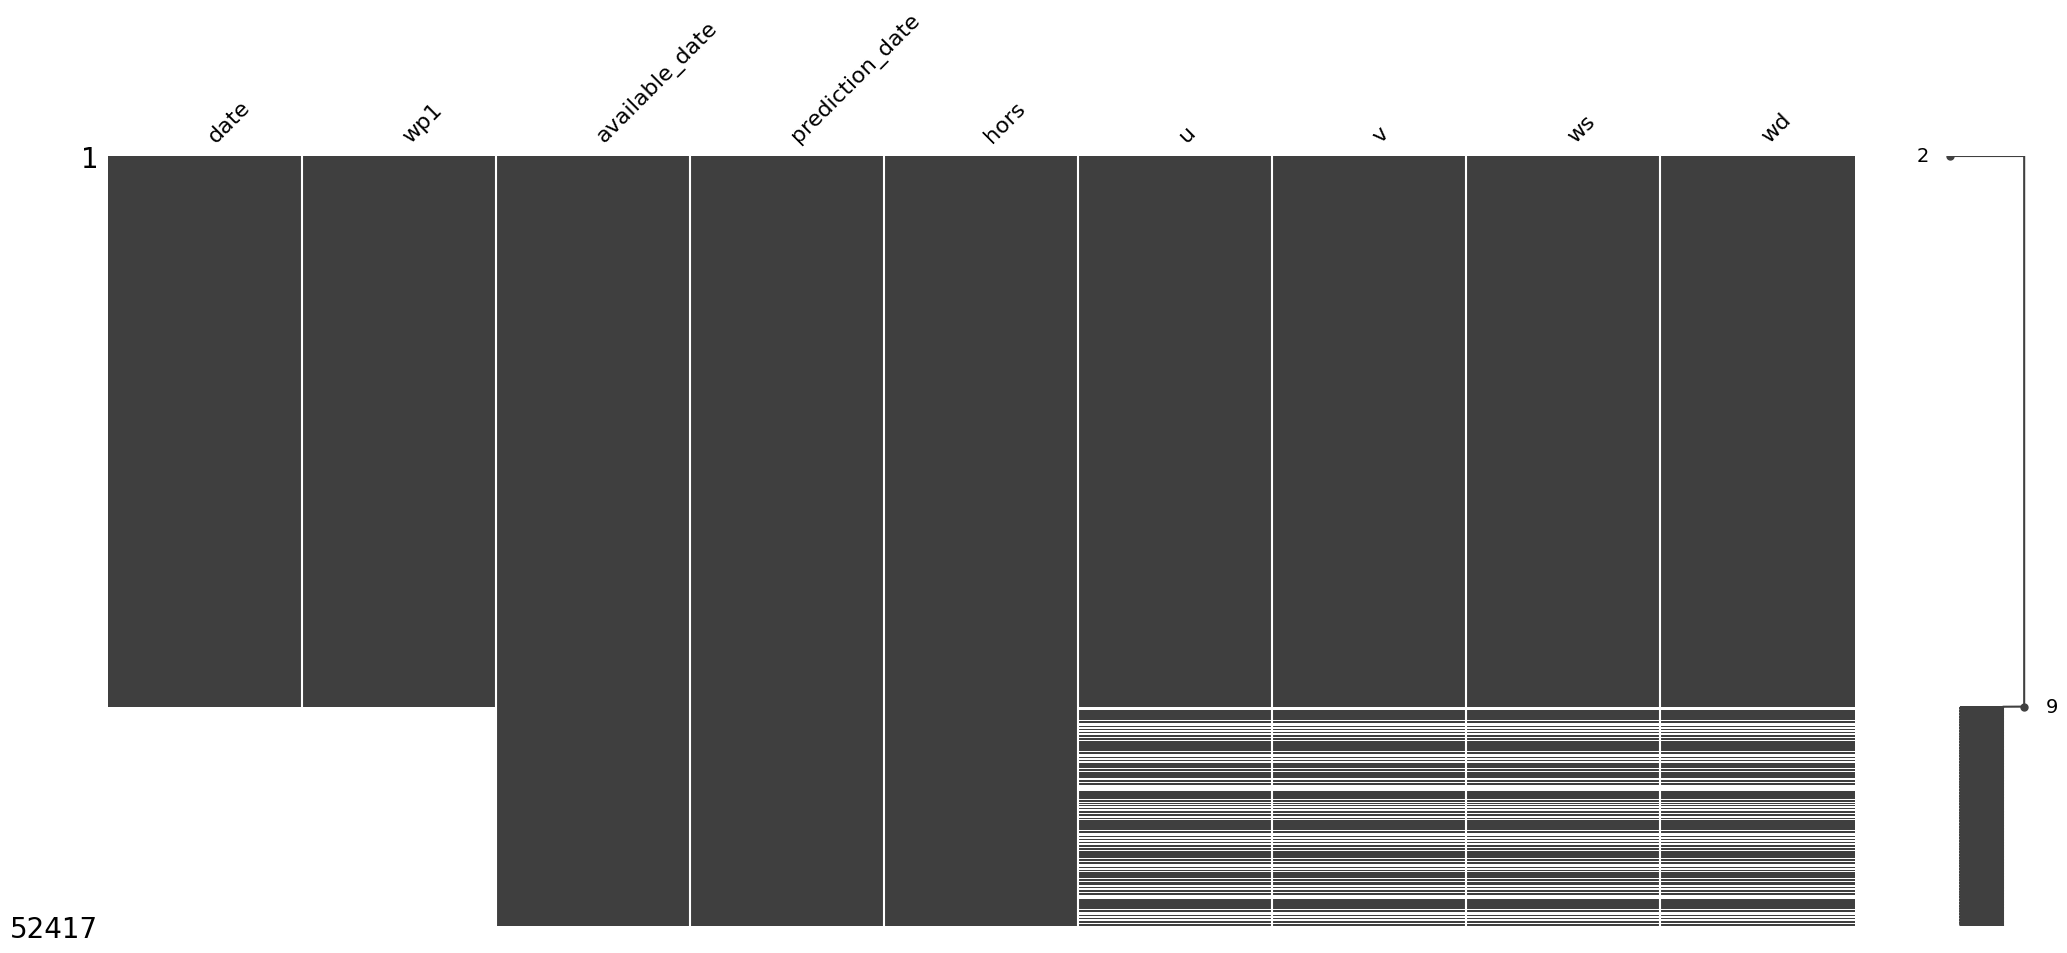

In [40]:
import missingno as msno

msno.matrix(df)